**Saida Huseyn**                                                                                              
**July, 2022**

**Capstone Project** Short term rental analysis: **What makes a super host?** Example of New York City Airbnb rentals.
- **Current Notebook**: Part 1 of 3 "Capstone_Data_Cleaning"
- **Next Notebook**: Part 2 of 3 "Capstone_EDA_Preprocessing"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm

%matplotlib inline

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.pipeline import Pipeline

np.random.seed(12345)

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
from mlxtend.preprocessing import TransactionEncoder

---

## The Data

The project aims analyzing New York City Airbnb listings to answer the following business questions:
- What makes a superhost? Analyze what makes Airbnb labeled superhosts different and how models predict superhosts
- What can investors (hosts) do to improve property performance and become superhosts?

> - Number of unique listings: 37631
> - Number of reviews: 928095 for 28657 listings


### Data Dictionary
- https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

|    | Column                                       | Dtype   | Description                                                                                                                                  |
|----|----------------------------------------------|---------|----------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | id                                           | int64   | id of a unique listing                                                                                                                       |
| 2  | listing_url                                  | object  | listing url used to scrape the data                                                                                                          |
| 3  | scrape_id                                    | int64   |                                                                                                                                              |
| 4  | last_scraped                                 | object  | last scrape date                                                                                                                             |
| 5  | name                                         | object  | listing name as posted on Airbnb                                                                                                             |
| 6  | description                                  | object  | listing brief description as posted on Airbnb                                                                                                |
| 7  | neighborhood_overview                        | object  | showt neighbourhood description                                                                                                              |
| 8  | picture_url                                  | object  | url used to scrape the data                                                                                                                  |
| 9  | host_id                                      | int64   | id of a host (host can have several listings)                                                                                                |
| 10 | host_url                                     | object  | url used to scrape the data                                                                                                                  |
| 11 | host_name                                    | object  |                                                                                                                                              |
| 12 | host_since                                   | object  | the date host first listed on Airbnb                                                                                                         |
| 13 | host_location                                | object  |                                                                                                                                              |
| 14 | host_about                                   | object  | description of a host                                                                                                                        |
| 15 | host_response_time                           | object  |                                                                                                                                              |
| 16 | host_response_rate                           | object  |                                                                                                                                              |
| 17 | host_acceptance_rate                         | object  | the rate at which a host accepts booking requests                                                                                            |
| 18 | host_is_superhost                            | object  |                                                                                                                                              |
| 19 | host_thumbnail_url                           | object  |                                                                                                                                              |
| 20 | host_picture_url                             | object  |                                                                                                                                              |
| 21 | host_neighbourhood                           | object  |                                                                                                                                              |
| 22 | host_listings_count                          | float64 | the number of listings the host has (per Airbnb calculations)                                                                                |
| 23 | host_total_listings_count                    | float64 | the number of listings the host has (per Airbnb calculations)                                                                                |
| 24 | host_verifications                           | object  |                                                                                                                                              |
| 25 | host_has_profile_pic                         | object  |                                                                                                                                              |
| 26 | host_identity_verified                       | object  |                                                                                                                                              |
| 27 | neighbourhood                                | object  |                                                                                                                                              |
| 28 | neighbourhood_cleansed                       | object  | The neighbourhood as geocoded using the latitude and                                                                                         |
|    |                                              |         | longitude against neighborhoods as defined by open                                                                                           |
|    |                                              |         | or public digital shapefiles.                                                                                                                |
| 29 | neighbourhood_group_cleansed                 | object  | The neighbourhood group as geocoded using the                                                                                                |
|    |                                              |         | latitude and longitude against neighborhoods as                                                                                              |
|    |                                              |         | defined by open or public digital shapefiles.                                                                                                |
| 30 | latitude                                     | float64 | Uses the World Geodetic System (WGS84) projection                                                                                            |
|    |                                              |         | for latitude and longitude.                                                                                                                  |
| 31 | longitude                                    | float64 | Uses the World Geodetic System (WGS84) projection                                                                                            |
|    |                                              |         | for latitude and longitude.                                                                                                                  |
| 32 | property_type                                | object  | Self selected property type. Hotels and Bed and                                                                                              |
|    |                                              |         | Breakfasts are described as such by their hosts in                                                                                           |
|    |                                              |         | this field                                                                                                                                   |
| 33 | room_type                                    | object  | https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean                                                              |
|    |                                              |         | All properties are grouped by Airbnb as follows:Entire home/apt, private room, shared room, hotel                                            |
| 34 | accommodates                                 | int64   | The maximum capacity of the listing                                                                                                          |
| 35 | bathrooms                                    | float64 | The number of bathrooms in the listing                                                                                                       |
| 36 | bathrooms_text                               | object  | "The number of bathrooms in the listing. On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For |
|    |                                              |         | older scrapes, bathrooms is used."                                                                                                           |
| 37 | bedrooms                                     | float64 | The number of bedrooms                                                                                                                       |
| 38 | beds                                         | float64 | The number of bed(s)                                                                                                                         |
| 39 | amenities                                    | object  | list of amenities as lists of strings                                                                                                        |
| 40 | price                                        | object  | daily price in local currency                                                                                                                |
| 41 | minimum_nights                               | int64   | minimum number of night stay for the listing (calendar rules may be different)                                                               |
| 42 | maximum_nights                               | int64   | maximum number of night stay for the listing (calendar rules may be different)                                                               |
| 43 | minimum_minimum_nights                       | float64 | the smallest minimum_night value from the calender (looking 365 nights in the future)                                                        |
| 44 | maximum_minimum_nights                       | float64 | the largest minimum_night value from the calender (looking 365 nights in the future)                                                         |
| 45 | minimum_maximum_nights                       | float64 | the smallest maximum_night value from the calender (looking 365 nights in the future)                                                        |
| 46 | maximum_maximum_nights                       | float64 | the largest maximum_night value from the calender (looking 365 nights in the future)                                                         |
| 47 | minimum_nights_avg_ntm                       | float64 | the average minimum_night value from the calender (looking 365 nights in the future)                                                         |
| 48 | maximum_nights_avg_ntm                       | float64 | the average maximum_night value from the calender (looking 365 nights in the future)                                                         |
| 49 | calendar_updated                             | float64 |                                                                                                                                              |
| 50 | has_availability                             | object  | [t=true; f=false]                                                                                                                            |
| 51 | availability_30                              | int64   | avaliability_x. The availability of the listing x                                                                                            |
| 52 | availability_60                              | int64   |                                                                                                                                              |
| 53 | availability_90                              | int64   |                                                                                                                                              |
| 54 | availability_365                             | int64   |                                                                                                                                              |
| 55 | calendar_last_scraped                        | object  |                                                                                                                                              |
| 56 | number_of_reviews                            | int64   | The number of reviews the listing has                                                                                                        |
| 57 | number_of_reviews_ltm                        | int64   | The number of reviews the listing has (in the last 12 months)                                                                                |
| 58 | number_of_reviews_l30d                       | int64   | The number of reviews the listing has (in the last 30 days)                                                                                  |
| 59 | first_review                                 | object  | The date of the first/oldest review                                                                                                          |
| 60 | last_review                                  | object  | The date of the last/newest review                                                                                                           |
| 61 | review_scores_rating                         | float64 |                                                                                                                                              |
| 62 | review_scores_accuracy                       | float64 |                                                                                                                                              |
| 63 | review_scores_cleanliness                    | float64 |                                                                                                                                              |
| 64 | review_scores_checkin                        | float64 |                                                                                                                                              |
| 65 | review_scores_communication                  | float64 |                                                                                                                                              |
| 66 | review_scores_location                       | float64 |                                                                                                                                              |
| 67 | review_scores_value                          | float64 |                                                                                                                                              |
| 68 | license                                      | object  | The licence/permit/registration number                                                                                                       |
| 69 | instant_bookable                             | object  | [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to                                        |
|    |                                              |         | requiring to accept their booking request. An indicator of a commercial listing.                                                             |
| 70 | calculated_host_listings_count               | int64   | The number of listings the host has in the current                                                                                           |
| 71 | calculated_host_listings_count_entire_homes  | int64   | The number of Entire home/apt listings the host has in the current scrape, in the city/region geography                                      |
| 72 | calculated_host_listings_count_private_rooms | int64   | The number of Private room listings the host has                                                                                             |
| 73 | calculated_host_listings_count_shared_rooms  | int64   | The number of Shared room listings the host has in the current scrape, in the city/region geography                                          |
| 74 | reviews_per_month                            | float64 | The number of reviews the listing has over the lifetime of the listing                                                                       |

### Import and read the tables

4 tables are used for the project:
- detailed listings table for 37631 unique short-term rental listings (number of rows) in New York City, explained by 74 features (number of columns)
- summary and detailed reviews tables: show every review a listing has since its first listing date. It also shows the dates for reviews.
- calendar table: the table contains 365 days of the calendar showing availability of the listings, price and adjusted price for every day on the calendar.

In [4]:
df=pd.read_csv('listings.csv')

C:\Users\saida\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


This is the main DataFrame that will be used for further analysis. All other tables play a supplimentary role, some of the information can be incorporated for feature engineering into the main table (**df**)

In [5]:
df.shape

(37631, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37631 non-null  int64  
 1   listing_url                                   37631 non-null  object 
 2   scrape_id                                     37631 non-null  int64  
 3   last_scraped                                  37631 non-null  object 
 4   name                                          37617 non-null  object 
 5   description                                   36624 non-null  object 
 6   neighborhood_overview                         22408 non-null  object 
 7   picture_url                                   37631 non-null  object 
 8   host_id                                       37631 non-null  int64  
 9   host_url                                      37631 non-null 

In [7]:
reviews_summary=pd.read_csv('reviews_summary.csv') #summary reviews
# use to get the following columns:
# 1. boolean- if tehre is a review in recent 6 month for a listing. true=1, false=0
# 2. number of reviews for the listing - total

In [8]:
reviews_summary.shape

(928095, 2)

In [9]:
reviews_summary.head()

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25


In [10]:
reviews_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928095 entries, 0 to 928094
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  928095 non-null  int64 
 1   date        928095 non-null  object
dtypes: int64(1), object(1)
memory usage: 14.2+ MB


In [11]:
reviews_summary['listing_id'].nunique() #reviews for 28657 listings

28657

There are **28657** unique listing IDs in reviews_summary table, meaning reviews are not available for **8974** listings in the **df** table. 

In [12]:
reviews_summary.groupby('listing_id').count().head()

,date
listing_id,
2595,48
5121,50
5136,2
5178,520
5203,118


In [13]:
reviews_summary.groupby('listing_id').count().describe() # what number of reviews per listing tells us?

,date
count,28657.000000
mean,32.386328
std,58.486964
min,1.000000
25%,3.000000
50%,9.000000
75%,33.000000
max,1024.000000


Looking at quartiles, half of the listings have less than 10 comments.

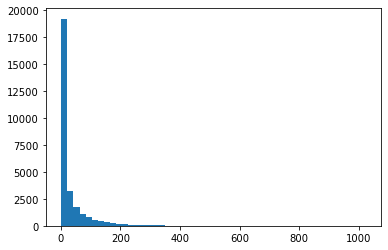

In [14]:
plt.hist(reviews_summary.groupby('listing_id').count(), bins=50)
plt.show()

In [15]:
reviews_detailed=pd.read_csv('reviews.csv') #detailed review table for NYC
# use this table to create top words features- use recent 2 years reviews

In [16]:
reviews_detailed.shape

(928095, 6)

In [17]:
reviews_detailed.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [19]:
calendar=pd.read_csv('calendar.csv') # detailed calendar 
# use this table to get: available false- means booked, then we can calculate days booked from a specific date

In [20]:
calendar.shape

(13470765, 7)

In [21]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,57754,2021-09-02,f,$285.00,$285.00,2.0,7.0
1,2595,2021-09-02,f,$150.00,$150.00,30.0,1125.0
2,2595,2021-09-03,f,$150.00,$150.00,30.0,1125.0
3,2595,2021-09-04,f,$150.00,$150.00,30.0,1125.0
4,2595,2021-09-05,f,$150.00,$150.00,30.0,1125.0


In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470765 entries, 0 to 13470764
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 719.4+ MB


Let's change the type of price, adjusted price and the data. That will help us to use these columns as an input into the main dataframe.

In [23]:
calendar['date']= pd.to_datetime(calendar['date'])

In [24]:
calendar['date'].dtype

dtype('<M8[ns]')

In [25]:
#replace dollar signs with the space and drop the space
calendar['price'] = calendar['price'].str.replace('$','')

C:\Users\saida\AppData\Local\Temp/ipykernel_23040/962353333.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$','')


In [26]:
calendar['price'] = pd.to_numeric(calendar['price'],errors = 'raise')

ValueError: Unable to parse string "2,500.00" at position 116282

In [28]:
calendar['price'].dtype

dtype('O')

In [29]:
calendar['price'] = calendar['price'].str.replace(',','')

In [30]:
calendar['price'] = pd.to_numeric(calendar['price'],errors = 'raise')

In [31]:
calendar['price'].dtype

dtype('float64')

In [32]:
#replace dollar signs with the space and drop the space
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','')

C:\Users\saida\AppData\Local\Temp/ipykernel_23040/884992683.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','')


In [33]:
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'],errors = 'raise')

ValueError: Unable to parse string "2,500.00" at position 116282

In [34]:
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',','')

In [35]:
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'],errors = 'raise')

In [36]:
calendar['adjusted_price'].dtype

dtype('float64')

In [37]:
#calendar.describe()

In [38]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,57754,2021-09-02,f,285.0,285.0,2.0,7.0
1,2595,2021-09-02,f,150.0,150.0,30.0,1125.0
2,2595,2021-09-03,f,150.0,150.0,30.0,1125.0
3,2595,2021-09-04,f,150.0,150.0,30.0,1125.0
4,2595,2021-09-05,f,150.0,150.0,30.0,1125.0


In [ ]:
# plt.plot(calendar['date'].Year(), calendar['price'])
# plt.show()

---

## Data cleaning
- drop variables(features-columns) we are not using
- clean duplicates
- fill in missing values
- change data types if needed

### Drop columns not used in analysis from the main DataFrame "df"

In [39]:
df.shape

(37631, 74)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37631 non-null  int64  
 1   listing_url                                   37631 non-null  object 
 2   scrape_id                                     37631 non-null  int64  
 3   last_scraped                                  37631 non-null  object 
 4   name                                          37617 non-null  object 
 5   description                                   36624 non-null  object 
 6   neighborhood_overview                         22408 non-null  object 
 7   picture_url                                   37631 non-null  object 
 8   host_id                                       37631 non-null  int64  
 9   host_url                                      37631 non-null 

Columns to drop:
- 'id','host_neighbourhood','listing_url', 'scrape_id', 'last_scraped', 'name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_location','host_about','host_thumbnail_url','host_picture_url','neighbourhood','bathrooms','calendar_updated','calendar_last_scraped','license','host_verifications','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_total_listings_count'
- id - every row represents a unique ID: no need to keep an extra column
- url links are not used in analysis
- name of the listing and description are contain repetititve and gramatically incorrect info. Difficult to extract a feature. Drop

In [41]:
data= df.drop(columns=['id','host_neighbourhood','listing_url', 'scrape_id', 'last_scraped', 'name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_location','host_about','host_thumbnail_url','host_picture_url','neighbourhood','bathrooms','calendar_updated','calendar_last_scraped','license','host_verifications', 'minimum_minimum_nights',
 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_total_listings_count'])

In [42]:
# drop host_listings_count as it is the same as calculated_host_listings_count
data=data.drop(columns=['host_listings_count', 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'])

Drop first and last review date as we are itnerested in the most recent reviews and number of those are reflected in other columns like total number_of_reviews,  number_of_reviews_ltm - reviews in recent 12 month,  number_of_reviews_l30d - reviews for recent 30 days

In [43]:
data=data.drop(columns=['first_review', 'last_review'])

In [44]:
data.shape

(37631, 39)

In [45]:
data.head(2)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2008-09-09,a few days or more,44%,18%,f,t,t,Midtown,Manhattan,40.75356,...,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,3,0.32
1,2009-02-03,NaN,NaN,100%,f,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,...,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,2,0.32


In [46]:
data= data.drop(columns=['host_response_time', 'host_response_rate', 'host_acceptance_rate'])

In [47]:
data.shape

(37631, 36)

In [48]:
data.duplicated().sum() # 20 duplicates

20

In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(37611, 36)

In [51]:
data.T.duplicated().sum() # no duplicated columns

0

In [52]:
data.isna().sum()

host_since                          87
host_is_superhost                   87
host_has_profile_pic                87
host_identity_verified              87
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      96
bedrooms                          3797
beds                              1014
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
has_availability                     0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
number_of_reviews_ltm                0
number_of_reviews_l30d   

---

### Missing values and Objects
**Missing values** Fill missing values with the following methods:
- Use the most representative group value
- Use mean value
- Use KNN imputer

**Objects** Convert into numbers

--- 

**host_since** convert to **host_months**
- the length of being a host in months is a better measure

In [53]:
#call todays data and find the difference between host first listing data and today. 
pd.Timestamp.today()

Timestamp('2022-07-01 21:07:59.320140')

In [54]:
data['host_since']=pd.to_datetime(data['host_since'])

In [55]:
data['host_since'].dtype

dtype('<M8[ns]')

In [56]:
data['host_months']=round((pd.Timestamp.today()-data['host_since'])/np.timedelta64(1,'M'))

In [57]:
data['host_months'].head()

0    166.0
1    161.0
2    161.0
3    160.0
4    161.0
Name: host_months, dtype: float64

In [58]:
data.shape

(37611, 37)

In [59]:
#drop host_since
data= data.drop(columns='host_since')

In [60]:
data.shape

(37611, 36)

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
data.head(1)

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_months
0,f,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",$150.00,30,1125,t,30,60,77,334,48,0,0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,f,3,0.32,166.0


In [63]:
data['host_months'].dtype

dtype('float64')

In [64]:
data['host_months'].describe()

count    37524.000000
mean        74.327550
std         35.626987
min          4.000000
25%         47.000000
50%         78.000000
75%        101.000000
max        166.000000
Name: host_months, dtype: float64

**Observations**:
- min months = 4, the most currently listed property has been listed 4 month before
- max months = 166, the longest posted listing is has been listed for 13 years

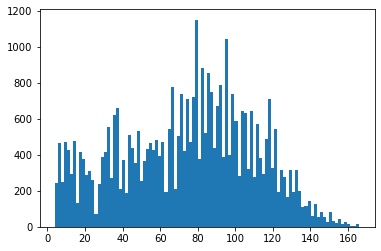

In [65]:
plt.hist(data['host_months'], bins=100);

In [66]:
data['host_months'].isna().sum() 

87

87 values missing. Fill with the mean value of 73. 

In [67]:
data['host_months'].fillna(73, inplace=True) #fill with mean value

In [68]:
data['host_months'].isna().sum()

0

---

**Superhost, pic, verified**

> All of these columns have 87 misisng values. Fill them the most representative group value
- host_is_superhost                                 87
- host_has_profile_pic                              87
- host_identity_verified                            87

In [69]:
data['host_is_superhost'].value_counts()

f    29707
t     7817
Name: host_is_superhost, dtype: int64

In [70]:
29707+7817

37524

In [71]:
data['host_is_superhost'].fillna('f', inplace=True) #fill with not superhost

In [72]:
data['host_is_superhost'].isna().sum()

0

In [73]:
data['host_has_profile_pic'].value_counts() 

t    37184
f      340
Name: host_has_profile_pic, dtype: int64

In [74]:
data['host_has_profile_pic'].fillna('t', inplace=True) #true values- has pic

In [75]:
data['host_has_profile_pic'].isna().sum()

0

In [76]:
data['host_identity_verified'].value_counts()

t    31427
f     6097
Name: host_identity_verified, dtype: int64

In [77]:
data['host_identity_verified'].fillna('t', inplace=True) #verified

In [78]:
data['host_identity_verified'].isna().sum()

0

In [79]:
data['host_identity_verified'].dtype

dtype('O')

We will convert them into boolean values (0 and 1) in the next section

---

**bathrooms_text**
- 96 missing values for this column, fill with the most representative value

In [80]:
# bathrooms_text  96 - missing values

In [81]:
data['bathrooms_text'].value_counts()

1 bath               19393
1 shared bath         9133
1 private bath        2837
2 baths               2196
2 shared baths        1078
1.5 baths             1013
1.5 shared baths       671
2.5 baths              309
3 baths                197
0 shared baths         129
3 shared baths         118
2.5 shared baths        98
3.5 baths               84
4 baths                 61
0 baths                 47
Half-bath               43
4 shared baths          29
4.5 baths               21
Shared half-bath        14
Private half-bath       11
5 baths                  8
6 baths                  7
4.5 shared baths         3
5.5 baths                3
3.5 shared baths         2
7.5 baths                2
7 baths                  2
6 shared baths           2
15 baths                 1
15.5 baths               1
6.5 baths                1
8 baths                  1
Name: bathrooms_text, dtype: int64

In [82]:
data['bathrooms_text'].fillna('1 bath', inplace=True) #one bathroom-the mode, most representative one

In [83]:
data['bathrooms_text'].isna().sum()

0

---

**Convert into number**
- as we clearly see the pattern of the column, split string to retrieve first element. 
- if it does not start with digit (like "shared.. , e.g.) we assign 1, in other cases we leave the value as it is. Only 68 values begin with a word, not a number
- change datatype to float 

In [84]:
data['bathrooms_text']=data['bathrooms_text'].apply(lambda x: x.split(' ')[0]).apply(lambda k: k if k[0].isdigit() else 1).astype(float)

In [85]:
data['bathrooms_text'].dtype

dtype('float64')

---

**price** convert into the number

In [86]:
data['price'].head()

0    $150.00
1     $60.00
2    $275.00
3     $68.00
4     $75.00
Name: price, dtype: object

In [87]:
#replace dollar signs with the space and drop the space
data['price'] = data['price'].str.replace('$','')

C:\Users\saida\AppData\Local\Temp/ipykernel_23040/3750837287.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$','')


In [88]:
data['price'] = pd.to_numeric(data['price'],errors = 'raise')

ValueError: Unable to parse string "2,500.00" at position 278

In [89]:
data['price'].dtype

dtype('O')

In [90]:
data['price'] = data['price'].str.replace(',','')

In [91]:
data['price'] = pd.to_numeric(data['price'],errors = 'raise')

In [92]:
data['price'].head()

0    150.0
1     60.0
2    275.0
3     68.0
4     75.0
Name: price, dtype: float64

In [93]:
data['price'].dtype

dtype('float64')

In [94]:
data['price'].isna().sum()

0

In [95]:
data.shape

(37611, 36)

---

**bedrooms**

In [96]:
data['bedrooms'].isna().sum()

3797

In [97]:
data['bedrooms'].head()

0    NaN
1    1.0
2    2.0
3    1.0
4    1.0
Name: bedrooms, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

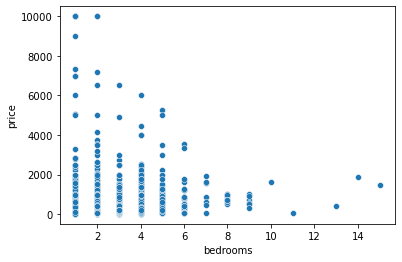

In [98]:
sns.scatterplot(data=data, x="bedrooms", y="price")

**Observations**:
- price has no linear relation with the number of bedrooms

In [99]:
data['bedrooms'].value_counts()

1.0     25915
2.0      5426
3.0      1834
4.0       473
5.0       103
6.0        36
8.0         9
7.0         7
9.0         6
14.0        1
10.0        1
15.0        1
11.0        1
13.0        1
Name: bedrooms, dtype: int64

In [100]:
data.groupby('bedrooms').mean()['price']

bedrooms
1.0      129.301061
2.0      238.578142
3.0      313.605780
4.0      500.376321
5.0      741.019417
6.0      764.666667
7.0     1029.857143
8.0      813.333333
9.0      666.000000
10.0    1643.000000
11.0      66.000000
13.0     412.000000
14.0    1886.000000
15.0    1473.000000
Name: price, dtype: float64

In [101]:
data[data['beds'].isna()].describe()['price']

count    1014.000000
mean      158.214004
std       328.848628
min         0.000000
25%        52.250000
50%        90.000000
75%       149.750000
max      7000.000000
Name: price, dtype: float64

In [102]:
data.groupby('bedrooms').mean()['price']

bedrooms
1.0      129.301061
2.0      238.578142
3.0      313.605780
4.0      500.376321
5.0      741.019417
6.0      764.666667
7.0     1029.857143
8.0      813.333333
9.0      666.000000
10.0    1643.000000
11.0      66.000000
13.0     412.000000
14.0    1886.000000
15.0    1473.000000
Name: price, dtype: float64

In [103]:
# I decided to fill nan values with medians of respective neighbourhood_group.
# as we see, no null values in this column

In [104]:
beds_meds = data[['beds','neighbourhood_group_cleansed']].groupby('neighbourhood_group_cleansed').median()
bedrooms_meds = data[['bedrooms','neighbourhood_group_cleansed']].groupby('neighbourhood_group_cleansed').median()

In [105]:
bedrooms_meds

,bedrooms
neighbourhood_group_cleansed,
Bronx,1.0
Brooklyn,1.0
Manhattan,1.0
Queens,1.0
Staten Island,1.0


In [106]:
beds_meds

,beds
neighbourhood_group_cleansed,
Bronx,1.0
Brooklyn,1.0
Manhattan,1.0
Queens,1.0
Staten Island,2.0


In [107]:
data['bedrooms'].fillna(1,inplace=True)

In [108]:
data['bedrooms'].isna().sum()

0

---

**beds**

Beds are definitive of the capacity of a listing. Thus, we don't want to drop this column. Let's fill missing values

In [109]:
data['beds'].isna().sum()

1014

In [110]:
1014/36000 #2.8% of the data is missing

0.028166666666666666

Explore beds to choose values for missing rows

In [111]:
beds_meds

,beds
neighbourhood_group_cleansed,
Bronx,1.0
Brooklyn,1.0
Manhattan,1.0
Queens,1.0
Staten Island,2.0


In [112]:
beds_meds['beds'].to_dict()

{'Bronx': 1.0,
 'Brooklyn': 1.0,
 'Manhattan': 1.0,
 'Queens': 1.0,
 'Staten Island': 2.0}

In [113]:
#proportion of different types of beds to total
# find largest groups
data['beds'].value_counts()/len(data['beds'])

1.0     0.624631
2.0     0.215682
3.0     0.077796
4.0     0.032916
5.0     0.010688
6.0     0.005663
7.0     0.002154
8.0     0.001462
9.0     0.000771
12.0    0.000399
10.0    0.000346
11.0    0.000213
16.0    0.000080
13.0    0.000053
18.0    0.000027
42.0    0.000027
25.0    0.000027
21.0    0.000027
24.0    0.000027
17.0    0.000027
14.0    0.000027
Name: beds, dtype: float64

In [114]:
# group price by beds
data.groupby('beds').mean()['price']

beds
1.0      127.963308
2.0      198.410873
3.0      239.455913
4.0      307.465267
5.0      387.631841
6.0      451.877934
7.0      458.851852
8.0      745.254545
9.0      647.517241
10.0     498.538462
11.0     995.125000
12.0     827.133333
13.0     675.000000
14.0    1029.000000
16.0    1948.666667
17.0    3500.000000
18.0     900.000000
21.0      66.000000
24.0     412.000000
25.0    1473.000000
42.0    1886.000000
Name: price, dtype: float64

In [115]:
#describe price distribution of misisng beds to understand what types of beds are missing
data[data['beds'].isna()].describe()['price']
#df[df['column name'].isna()]

count    1014.000000
mean      158.214004
std       328.848628
min         0.000000
25%        52.250000
50%        90.000000
75%       149.750000
max      7000.000000
Name: price, dtype: float64

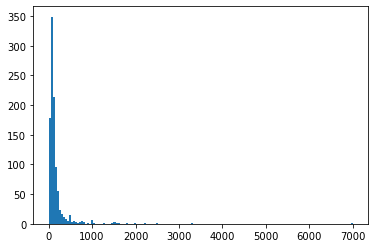

In [116]:
plt.hist(data[data['beds'].isna()]['price'], bins=150);

In [117]:
data['beds'].describe()

count    36597.000000
mean         1.602208
std          1.114312
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: beds, dtype: float64

In [118]:
# compute mean and std of `beds`
beds_mean = data['beds'].mean()
beds_std = data['beds'].std()

# number of NaN in `beds` column
num_na = data['beds'].isna().sum()

# generate `num_na` samples from N(age_mean, age_std**2) distribution
rand_vals = beds_mean + beds_std * np.random.randn(num_na)

# replace missing values with `rand_vals`
data.loc[data['beds'].isna(), 'beds'] = rand_vals

In [119]:
data['beds'].isna().sum()

0

In [120]:
data.head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_months
0,f,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1.0,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",150.0,30,1125,t,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,3,0.32,166.0
1,f,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",60.0,30,730,t,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,2,0.32,161.0


---

**reviews_per_month**
- drop the column as similar information is given in the other three columns: review 30 days, review 12 month, total reviews
- another reason why to drop the column, is that in reality only recent (up to one year) reviews are the most influencial in customer decision and the frequency over the whole lifetime of the listing is not informative. 

In [121]:
data['reviews_per_month'].isna().sum() 

8954

In [122]:
data= data.drop(columns='reviews_per_month')

In [123]:
data.shape

(37611, 35)

---

**review_scores**

- review_scores_rating                            8954
- review_scores_accuracy                          9463
- review_scores_cleanliness                       9453
- review_scores_checkin                           9468
- review_scores_communication                     9459
- review_scores_location                          9471
- review_scores_value                             9472

Review scores are important to measure super host status and total performance of a listing. Thus, we use KNN to impute missing values for the review score groups

We will impute these missing values only after train, validation, test split. We will fit knn only to the train set, transform both validation and test set X values

In [124]:
from sklearn.impute import KNNImputer

In [ ]:
# missing_values=data_l[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
#                      'review_scores_value']]

In [ ]:
# missing_values.shape

In [ ]:
# # define imputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# # fit on the dataset
# imputer.fit(missing_values)
# # transform the dataset
# missing_trans = imputer.transform(missing_values)

---

### Cleaning-continued (objects) 
- convert objects into numbers
- create dummies

In [125]:
object_columns=data.select_dtypes("object").columns
object_columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'amenities', 'has_availability',
       'instant_bookable'],
      dtype='object')

In [126]:
data[object_columns].describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,has_availability,instant_bookable
count,37611,37611,37611,37611,37611,37611,37611,37611,37611,37611
unique,2,2,2,223,5,87,4,31488,2,2
top,f,t,t,Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt,"[""Long term stays allowed""]",t,f
freq,29794,37271,31514,2825,16073,15665,20350,134,30635,28397


**Convert**: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','has_availability', 'instant_bookable'

In [127]:
#convert into boolean columns

In [128]:
data['host_is_superhost']=data['host_is_superhost'].map({'f':0,'t':1})
data['host_has_profile_pic']=data['host_has_profile_pic'].map({'f':0,'t':1})
data['host_identity_verified']=data['host_identity_verified'].map({'f':0,'t':1})
data['has_availability']=data['has_availability'].map({'f':0,'t':1})
data['instant_bookable']=data['instant_bookable'].map({'f':0,'t':1})

In [129]:
data.select_dtypes("object").columns

Index(['neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'amenities'],
      dtype='object')

---

**neighbourhood_cleansed**

In [130]:
data['neighbourhood_cleansed'].value_counts().count() #223 neigh.ds for 5 regions
# use in analysis only if you see a specific deviation for a group

223

In [131]:
data=data.drop(columns='neighbourhood_cleansed')

In [132]:
data.shape

(37611, 34)

---

**neighbourhood_group_cleansed**

In [133]:
#create dummies
data['neighbourhood_group_cleansed'].value_counts().count()

5

In [134]:
data['neighbourhood_group_cleansed'].value_counts()

Manhattan        16073
Brooklyn         14367
Queens            5633
Bronx             1203
Staten Island      335
Name: neighbourhood_group_cleansed, dtype: int64

Manhattan is the most popular destination for the short term rental followed by Brooklyn. Queens, Bronx and Staten Island have far less number of listings.

In [135]:
data['neighbourhood_group_cleansed'].isna().sum()

0

No missing values. Convert into dummies

In [136]:
ng=pd.get_dummies(data['neighbourhood_group_cleansed'], columns='neighbourhood_group_cleansed')


In [137]:
ng.head(2)

# drop one group

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,0,0
1,0,1,0,0,0


In [138]:
# concate data with ng and drop the original column

In [139]:
data=pd.concat([data, ng], axis=1).drop(columns='neighbourhood_group_cleansed')

In [140]:
data.head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_months,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1.0,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",150.0,30,1125,1,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,166.0,0,0,1,0,0
1,0,1,1,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",60.0,30,730,1,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,161.0,0,1,0,0,0


In [141]:
data.shape

(37611, 38)

---

**room_type** and **property_type**
- use one

In [142]:
data['room_type'].value_counts()

Entire home/apt    20350
Private room       16492
Shared room          571
Hotel room           198
Name: room_type, dtype: int64

In [143]:
data['room_type'].isna().sum()

0

In [144]:
rt=pd.get_dummies(data['room_type'], columns='room_type')

In [145]:
rt.head(2)

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,0,0,1,0


In [146]:
data=pd.concat([data, rt], axis=1).drop(columns=['room_type','property_type'])

In [147]:
data.shape

(37611, 40)

In [148]:
data.head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_months,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Hotel room,Private room,Shared room
0,0,1,1,40.75356,-73.98559,1,1.0,1.0,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",150.0,30,1125,1,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,166.0,0,0,1,0,0,1,0,0,0
1,0,1,1,40.68535,-73.95512,2,1.0,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",60.0,30,730,1,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,161.0,0,1,0,0,0,0,0,1,0


---

**'amenities'**

###### Use this column in two ways:
- create a column of amenities lengths for each listing; number of amenities a listing has
- create dummie variables for the most frequent amenities (choose several)

One: Create a column "amenities_number" that represents number of amenities for each listing.

In [149]:
data['amenities'].head(2)

0    ["Bathtub", "Dishes and silverware", "Air cond...
1    ["Kitchen", "Wifi", "Air conditioning", "Long ...
Name: amenities, dtype: object

In [150]:
list(data['amenities'].head(2))

['["Bathtub", "Dishes and silverware", "Air conditioning", "Luggage dropoff allowed", "Oven", "Long term stays allowed", "Iron", "Heating", "Carbon monoxide alarm", "Refrigerator", "Keypad", "Free street parking", "Cooking basics", "Bed linens", "Hair dryer", "Dedicated workspace", "TV", "Extra pillows and blankets", "Paid parking off premises", "Hot water", "Ethernet connection", "Kitchen", "Coffee maker", "Fire extinguisher", "Wifi", "Stove", "Smoke alarm", "Essentials", "Hangers", "Cleaning before checkout", "Baking sheet"]',
 '["Kitchen", "Wifi", "Air conditioning", "Long term stays allowed", "Heating"]']

In [151]:
len(data['amenities'])

37611

In [152]:
eval(data['amenities'][1])

['Kitchen', 'Wifi', 'Air conditioning', 'Long term stays allowed', 'Heating']

In [153]:
len(eval(data['amenities'][1])) 

5

In [154]:
#data=data.assign(amenities_number=lambda x: len(eval(data['amenities'][])))

In [155]:
data['amenities'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            37621, 37622, 37623, 37624, 37625, 37626, 37627, 37628, 37629,
            37630],
           dtype='int64', length=37611)

In [156]:
number_of_amenities=[]

for x in data['amenities'].index:
    
    number_of_amenities.append(len(eval(data['amenities'][x])))

print(number_of_amenities)

[31, 5, 14, 25, 16, 47, 28, 19, 18, 12, 48, 8, 10, 28, 17, 11, 28, 26, 8, 27, 10, 26, 21, 17, 32, 32, 35, 10, 24, 44, 17, 46, 42, 39, 27, 38, 42, 28, 27, 26, 28, 10, 22, 13, 33, 34, 13, 11, 9, 12, 9, 27, 26, 50, 44, 15, 38, 20, 34, 36, 30, 9, 21, 17, 24, 51, 35, 27, 24, 9, 26, 35, 12, 24, 19, 15, 26, 25, 56, 29, 16, 37, 38, 30, 19, 20, 31, 16, 34, 6, 32, 3, 23, 15, 40, 10, 17, 12, 11, 32, 33, 59, 9, 18, 46, 7, 11, 13, 20, 28, 13, 23, 20, 57, 43, 41, 33, 51, 28, 19, 42, 28, 18, 12, 30, 16, 38, 21, 55, 11, 39, 14, 18, 14, 20, 16, 39, 36, 28, 9, 5, 13, 19, 7, 7, 26, 13, 19, 9, 20, 28, 27, 38, 36, 38, 33, 35, 36, 31, 1, 31, 11, 55, 24, 45, 39, 6, 30, 16, 38, 34, 55, 11, 42, 18, 8, 36, 1, 25, 18, 24, 25, 13, 25, 20, 24, 28, 28, 24, 24, 25, 39, 24, 42, 22, 16, 18, 21, 23, 6, 21, 38, 36, 49, 19, 46, 23, 15, 32, 41, 16, 17, 32, 13, 6, 14, 12, 22, 34, 23, 31, 37, 22, 19, 21, 24, 31, 12, 12, 39, 27, 25, 52, 17, 24, 35, 20, 32, 26, 33, 6, 7, 24, 11, 7, 28, 26, 10, 15, 1, 26, 19, 42, 7, 33, 34, 7,

In [157]:
data['amenities_number'] = number_of_amenities

In [158]:
data.head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_months,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Hotel room,Private room,Shared room,amenities_number
0,0,1,1,40.75356,-73.98559,1,1.0,1.0,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",150.0,30,1125,1,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,166.0,0,0,1,0,0,1,0,0,0,31
1,0,1,1,40.68535,-73.95512,2,1.0,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",60.0,30,730,1,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,161.0,0,1,0,0,0,0,0,1,0,5


In [159]:
data['amenities_number'].isna().sum()

0

Two: choose some amenities to use for analysis

In [160]:
list_of_amenities = data['amenities'].apply(lambda x: eval(x.lower())).tolist()

In [161]:
list_of_amenities

[['bathtub',
  'dishes and silverware',
  'air conditioning',
  'luggage dropoff allowed',
  'oven',
  'long term stays allowed',
  'iron',
  'heating',
  'carbon monoxide alarm',
  'refrigerator',
  'keypad',
  'free street parking',
  'cooking basics',
  'bed linens',
  'hair dryer',
  'dedicated workspace',
  'tv',
  'extra pillows and blankets',
  'paid parking off premises',
  'hot water',
  'ethernet connection',
  'kitchen',
  'coffee maker',
  'fire extinguisher',
  'wifi',
  'stove',
  'smoke alarm',
  'essentials',
  'hangers',
  'cleaning before checkout',
  'baking sheet'],
 ['kitchen', 'wifi', 'air conditioning', 'long term stays allowed', 'heating'],
 ['dryer',
  'carbon monoxide alarm',
  'kitchen',
  'outdoor dining area',
  'wifi',
  'air conditioning',
  'washer',
  'cable tv',
  'smoke alarm',
  'bbq grill',
  'tv with standard cable',
  'long term stays allowed',
  'outdoor furniture',
  'heating'],
 ['microwave',
  'air conditioning',
  'luggage dropoff allowed',
 

In [162]:
unique_amenities = list()
for l in list_of_amenities:
    unique_amenities.extend(l)

unique_amenities = set(unique_amenities)

In [163]:
unique_amenities

{'hdtv with standard cable, netflix, premium cable',
 'natural liquid body wash body soap',
 'fast wifi – 226 mbps',
 'dove body wash  body soap',
 'antibacterial conditioner',
 'gym nearby',
 '40" hdtv with amazon prime video, netflix, standard cable, hbo max',
 'hdtv with amazon prime video, apple tv, chromecast, netflix',
 'fast wifi – 439 mbps',
 'dove and kiehls  body soap',
 'herbal esscense  conditioner',
 'google home bluetooth sound system',
 'free street parking',
 'mini fridge refrigerator',
 '55" hdtv with chromecast, netflix, amazon prime video, hbo max',
 'boss speaker, google home hub bluetooth sound system',
 'fast wifi – 502 mbps',
 'dolby atmos sound system',
 'blind barber body soap',
 '75" hdtv with roku',
 'hdtv with amazon prime video, hbo max',
 'monat vegan premium hair products conditioner',
 'fridgedare stainless steel gas stove',
 'meyers  body soap',
 'fast wifi – 65 mbps',
 'miele appliances stainless steel oven',
 'marshalls stanmore speaker bluetooth soun

In [164]:
len(unique_amenities)

3777

As we see, there are 3777 unique amenities, the reason is that for example, for the TV and packages there are so many combination of TV models(brand, inches etc), makes and TV packages (like prime, netflix etc). 

We decided to use general amenity words used in most cases like: 'wifi', 'tv', 'hot water', 'air conditioning','bathtub','dedicated workspace','board games','sound system','bbq grill','refrigerator'

In [165]:
amenities_to_select = ['wifi', 'tv', 'hot water', 'air conditioning','bathtub','dedicated workspace','board games','sound system','bbq grill','refrigerator']

In [166]:
# our initial values are strings
data['amenities'][0]

'["Bathtub", "Dishes and silverware", "Air conditioning", "Luggage dropoff allowed", "Oven", "Long term stays allowed", "Iron", "Heating", "Carbon monoxide alarm", "Refrigerator", "Keypad", "Free street parking", "Cooking basics", "Bed linens", "Hair dryer", "Dedicated workspace", "TV", "Extra pillows and blankets", "Paid parking off premises", "Hot water", "Ethernet connection", "Kitchen", "Coffee maker", "Fire extinguisher", "Wifi", "Stove", "Smoke alarm", "Essentials", "Hangers", "Cleaning before checkout", "Baking sheet"]'

In [167]:
type(data['amenities'][0])

str

In [168]:
for amen in amenities_to_select:
    data[amen] = data['amenities'].apply(lambda x: eval(x.lower())).apply(lambda h: 1 if amen in h else 0)

In [169]:
amenities_to_select

['wifi',
 'tv',
 'hot water',
 'air conditioning',
 'bathtub',
 'dedicated workspace',
 'board games',
 'sound system',
 'bbq grill',
 'refrigerator']

In [170]:
data[amenities_to_select]

,wifi,tv,hot water,air conditioning,bathtub,dedicated workspace,board games,sound system,bbq grill,refrigerator
0,1,1,1,1,1,1,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,1
4,1,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
37626,1,0,0,0,0,1,0,0,0,0
37627,1,0,1,1,1,1,0,0,0,0
37628,1,0,1,1,1,1,0,0,0,0
37629,1,1,0,0,0,0,0,0,0,0


In [171]:
data.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_months,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Hotel room,Private room,Shared room,amenities_number,wifi,tv,hot water,air conditioning,bathtub,dedicated workspace,board games,sound system,bbq grill,refrigerator
0,0,1,1,40.75356,-73.98559,1,1.0,1.0,1.0,"[""Bathtub"", ""Dishes and silverware"", ""Air cond...",150.0,30,1125,1,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,166.0,0,0,1,0,0,1,0,0,0,31,1,1,1,1,1,1,0,0,0,1
1,0,1,1,40.68535,-73.95512,2,1.0,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Long ...",60.0,30,730,1,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,161.0,0,1,0,0,0,0,0,1,0,5,1,0,0,1,0,0,0,0,0,0
2,0,1,1,40.66265,-73.99454,4,1.5,2.0,2.0,"[""Dryer"", ""Carbon monoxide alarm"", ""Kitchen"", ...",275.0,5,1125,1,0,0,0,201,2,1,0,5.00,5.00,5.00,5.00,5.00,4.50,5.00,0,1,161.0,0,1,0,0,0,1,0,0,0,14,1,0,0,1,0,0,0,0,1,0
3,0,1,0,40.76457,-73.98317,2,1.0,1.0,1.0,"[""Microwave"", ""Air conditioning"", ""Luggage dro...",68.0,2,14,1,5,7,10,154,520,46,2,4.22,4.22,3.74,4.67,4.43,4.87,4.37,0,1,160.0,0,0,1,0,0,0,0,1,0,25,1,1,1,1,0,0,0,0,0,1
4,0,1,1,40.80380,-73.96751,1,1.0,1.0,1.0,"[""Hot water"", ""Elevator"", ""Dedicated workspace...",75.0,2,14,1,0,0,0,0,118,0,0,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0,1,161.0,0,0,1,0,0,0,0,1,0,16,1,0,1,1,0,1,0,0,0,0


In [172]:
data.shape

(37611, 51)

In [173]:
data['bathtub'].sum()

7757

In [174]:
data['sound system'].sum()

552

In [175]:
data['dedicated workspace'].sum()

22940

In [176]:
data['board games'].sum()

1074

Some examples of amenities being present for listings

---

**Using Transaction Encoder**
- an alternative to choosing amenities subjectively

In [ ]:
te = TransactionEncoder()

In [ ]:
data['amenities']

In [ ]:
te_ary = te.fit(data['amenities']).transform(data['amenities'])
te_ary

In [ ]:
te_ary.astype("int")

In [ ]:
#te.columns_

In [ ]:
#data.isna().sum()

In [ ]:
object_columns=data.select_dtypes("object").columns
object_columns

In [177]:
# data= data.drop(columns='amenities')

In [178]:
data.shape

(37611, 50)

---

### Analyze and drop outliers for "price"

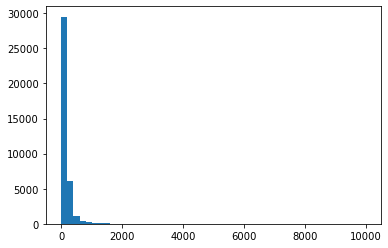

In [179]:
plt.hist(data['price'], bins=50)
plt.show()

In [180]:
data['price'].describe()

count    37611.000000
mean       166.169286
std        306.814791
min          0.000000
25%         68.000000
50%        112.000000
75%        180.000000
max      10000.000000
Name: price, dtype: float64

In [181]:
data.head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,host_months,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Hotel room,Private room,Shared room,amenities_number,wifi,tv,hot water,air conditioning,bathtub,dedicated workspace,board games,sound system,bbq grill,refrigerator
0,0,1,1,40.75356,-73.98559,1,1.0,1.0,1.0,150.0,30,1125,1,30,60,77,334,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,166.0,0,0,1,0,0,1,0,0,0,31,1,1,1,1,1,1,0,0,0,1
1,0,1,1,40.68535,-73.95512,2,1.0,1.0,1.0,60.0,30,730,1,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,161.0,0,1,0,0,0,0,0,1,0,5,1,0,0,1,0,0,0,0,0,0


In [182]:
data[data['price']>2000].count()

host_is_superhost                 87
host_has_profile_pic              87
host_identity_verified            87
latitude                          87
longitude                         87
accommodates                      87
bathrooms_text                    87
bedrooms                          87
beds                              87
price                             87
minimum_nights                    87
maximum_nights                    87
has_availability                  87
availability_30                   87
availability_60                   87
availability_90                   87
availability_365                  87
number_of_reviews                 87
number_of_reviews_ltm             87
number_of_reviews_l30d            87
review_scores_rating              45
review_scores_accuracy            45
review_scores_cleanliness         45
review_scores_checkin             45
review_scores_communication       45
review_scores_location            45
review_scores_value               45
i

Let's check prices less than 10 dollars per night

In [184]:
data[data['price']<=10].count()

host_is_superhost                 44
host_has_profile_pic              44
host_identity_verified            44
latitude                          44
longitude                         44
accommodates                      44
bathrooms_text                    44
bedrooms                          44
beds                              44
price                             44
minimum_nights                    44
maximum_nights                    44
has_availability                  44
availability_30                   44
availability_60                   44
availability_90                   44
availability_365                  44
number_of_reviews                 44
number_of_reviews_ltm             44
number_of_reviews_l30d            44
review_scores_rating              23
review_scores_accuracy            23
review_scores_cleanliness         23
review_scores_checkin             23
review_scores_communication       23
review_scores_location            23
review_scores_value               23
i

- There are only 87 rows where the price is greater than USD 2000.
- Also, there are 44 listings with the price from USD 0 to USD 10. 
- Drop those columns to avoid outliers

In [188]:
data.drop(data.index[data['price'] <= 10], inplace=True)
data.shape

(37567, 50)

In [189]:
data[data['price']>2000].count()

host_is_superhost                 87
host_has_profile_pic              87
host_identity_verified            87
latitude                          87
longitude                         87
accommodates                      87
bathrooms_text                    87
bedrooms                          87
beds                              87
price                             87
minimum_nights                    87
maximum_nights                    87
has_availability                  87
availability_30                   87
availability_60                   87
availability_90                   87
availability_365                  87
number_of_reviews                 87
number_of_reviews_ltm             87
number_of_reviews_l30d            87
review_scores_rating              45
review_scores_accuracy            45
review_scores_cleanliness         45
review_scores_checkin             45
review_scores_communication       45
review_scores_location            45
review_scores_value               45
i

In [190]:
data.drop(data.index[data['price'] >= 2000 ], inplace=True)

In [191]:
data.shape

(37460, 50)

**Price** outliers are dropped. 



---

### Feature Engineering cont'd

Create **"price_greater_than_mean_neigh"**
- if the price is greater than mean of neighbourhood group or greater than 75% quartile
- create a boolean column; yes, no

In [ ]:
#df['neighbourhood_group_cleansed']

In [194]:
#df.groupby(['neighbourhood_group_cleansed']).mean()['price']

In [ ]:
#df['price_greater_than_mean_neigh']=df['price_greater_than_mean_neigh'].map({df["price"]>df.groupby(['neighbourhood_group_cleansed']).mean()['price']:1, else 0})

In [ ]:
#data['host_is_superhost']=data['host_is_superhost'].map({'f':0,'t':1})

Create **"consecutive_availability_90d"**
- recent 3 month - how many days are available-consecutive, max, min availability

Missing values, duplicates and object data is cleaned. However, missing values for the review_scores will be filled using KNN imputer after train, validation, test split.

Let's save cleaned data

In [4]:
%store data

UsageError: Unknown variable 'data'


In [ ]:
data.to_csv('listings_data_cleaned.csv')

In [199]:
data.to_csv('C:/Users/saida/OneDrive/DataAnlyticsBrainStation/Bootcamp/capstone/listings_data_cleaned.csv')